In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import math
import import_ipynb


importing Jupyter notebook from LotArea_SalePrice.ipynb


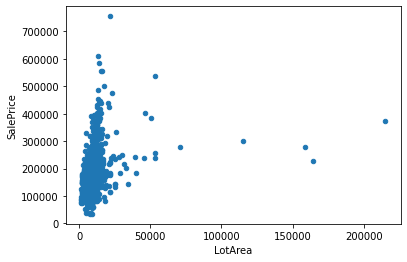

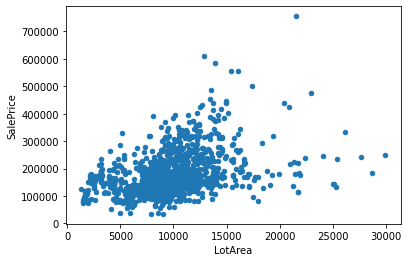

In [2]:
import LotArea_SalePrice
variables = LotArea_SalePrice.variables

Below are necessary functions for calculating linear regression equation
Y = B0 + B1*X
Y-dependent variable
X-independent variable
B0 - intercept
B1 - slope

In [3]:

def calculateMean(valuesArray):
    sum = float(0);
    for x in valuesArray: 
        sum += x
    return float(sum)/len(valuesArray)


def sumOfResiduals(xMean,yMean, xArr, yArr): 
    sum = float(0)
    for x in range(0, len(xArr)):
        sum += float((xArr[x]-xMean)*(yArr[x]-yMean))
    return float(sum)

def sumOfSSE(xMean, xArr):
    sum = float(0)
    for x in xArr:
        sum+=float((x-xMean)**2)
    return sum

def intercept(meanY, meanX, slope):
    return float(meanY)-(slope*meanX)
def slope(sumOfResiduals, sumOfSSE):
    return float(sumOfResiduals)/float(sumOfSSE)

def predict(indepVar, slope, intercept):
    depVar = intercept+(slope*indepVar)
    return depVar

def calcSSR(yPredArray, yMean):
    total = 0
    for y in yPredArray:
        total+=(y-yMean)**2
    return total
    
def calcSST(yActArray, yMean):
    total = 0
    for y in yActArray:
        total+=(y-yMean)**2
    return total
def fit(_xArr, _yArr):
    _xMean = calculateMean(_xArr.tolist())
    _yMean = calculateMean(_yArr.tolist())
    _sumOfResiduals = sumOfResiduals(_xMean, _yMean, _xArr.tolist(), _yArr.tolist())
    _sumOfSSE = sumOfSSE(_xMean, _xArr.tolist())
    _slope = slope(_sumOfResiduals, _sumOfSSE)
    _intercept = intercept(_yMean, _xMean, _slope)
    return {
        "slope": _slope,
        "intercept": _intercept,
        "xMean": _xMean,
        "yMean": _yMean,
        "SSR": _sumOfResiduals,
        "SSE": _sumOfSSE
    }


Splitting the train data for later prediction and actual value comparison purpose

In [4]:
length = len(variables.index.astype(int))
test_variables = variables.iloc[int(length-length/4):]


Fitting the model 

In [5]:
#LotArea is x and SalePrice is y

_xArr = variables["LotArea"]
_yArr = variables["SalePrice"]
fitObject=fit(_xArr, _yArr)
print(fitObject)


{'slope': 8.073401233135574, 'intercept': 102170.96942386875, 'xMean': 9627.4578313253, 'yMean': 179897.29935125116, 'SSR': 130935062823.1207, 'SSE': 16218079473.831343}


Creating the regression line for evaluate model

TypeError: can only concatenate list (not "int") to list

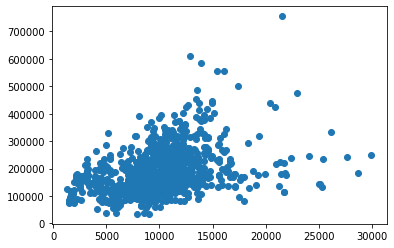

In [12]:
# #The regression line must pass through centroid 
# #The centroid must be at point (xMean, yMean)
# #x=1 uyd y
# y1 = predict(1, fitObject["slope"], fitObject["intercept"])
# #x=8000 uyd y
# y2 = predict(30000, fitObject["slope"], fitObject["intercept"])
# print(y1, y2)
# plt.plot([1, fitObject["xMean"], 30000], [y1, fitObject["yMean"], y2])
# variables.plot.scatter(x='LotArea', y='SalePrice')
x = variables["LotArea"].tolist()
y = variables["SalePrice"].tolist()
plt.plot(x, y, "o")
plt.plot(x, round(fitObject["slope"])*x + round(fitObject["intercept"]))


Calculating coefficient of determination

In [7]:
predictedSalePrice = []
for x in test_variables["LotArea"].tolist():
    predictedSalePrice.append(predict(x,fitObject["slope"],fitObject["intercept"]))
predictedSalePrice

coefOfDeter = calcSSR(predictedSalePrice, fitObject["yMean"])/calcSST(test_variables["SalePrice"].tolist(),fitObject["yMean"])
print("Coefficient of determination is: ",(coefOfDeter))
print("Sqr root of coefOfDeter", math.sqrt(coefOfDeter))


Coefficient of determination is:  0.24774720511904863
Sqr root of coefOfDeter 0.4977421070384227


In [8]:
test_variables["predicted"]=predictedSalePrice
test_variables

<ipython-input-8-1e0f55f5423b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_variables["predicted"]=predictedSalePrice


,LotArea,SalePrice,predicted
824,11216,232600,192722.237655
825,14803,385000,221681.527878
826,6130,109500,151660.918983
827,8529,189000,171029.008541
828,28698,185000,333861.438012
...,...,...,...
1090,8544,92900,171150.109560
1091,2160,160000,119609.516087
1092,8400,136500,169987.539782
1093,9230,146000,176688.462806
